In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [6]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [7]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [8]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [9]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [10]:
# Duplicated
df.duplicated().sum()

14342

In [11]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

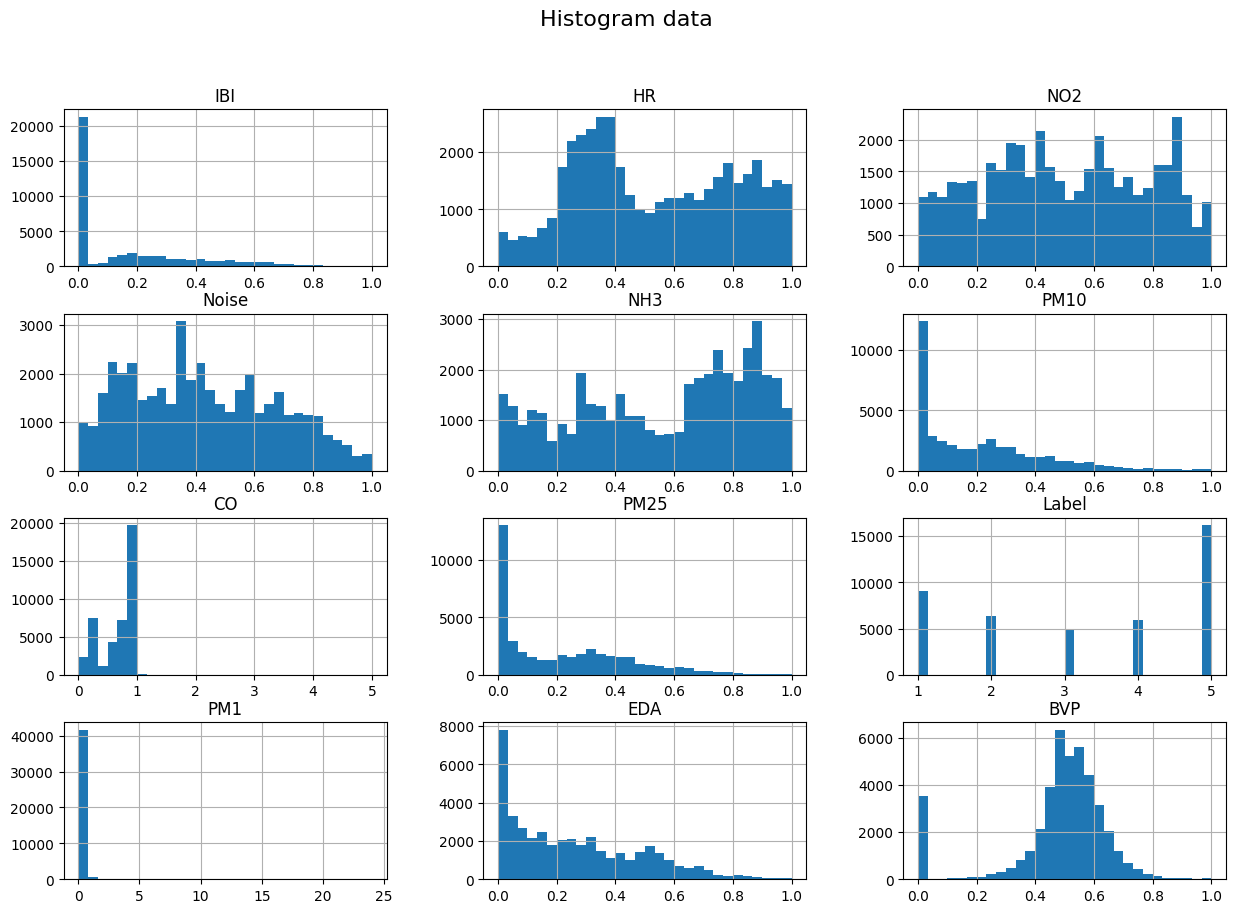

In [12]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [13]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2981/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


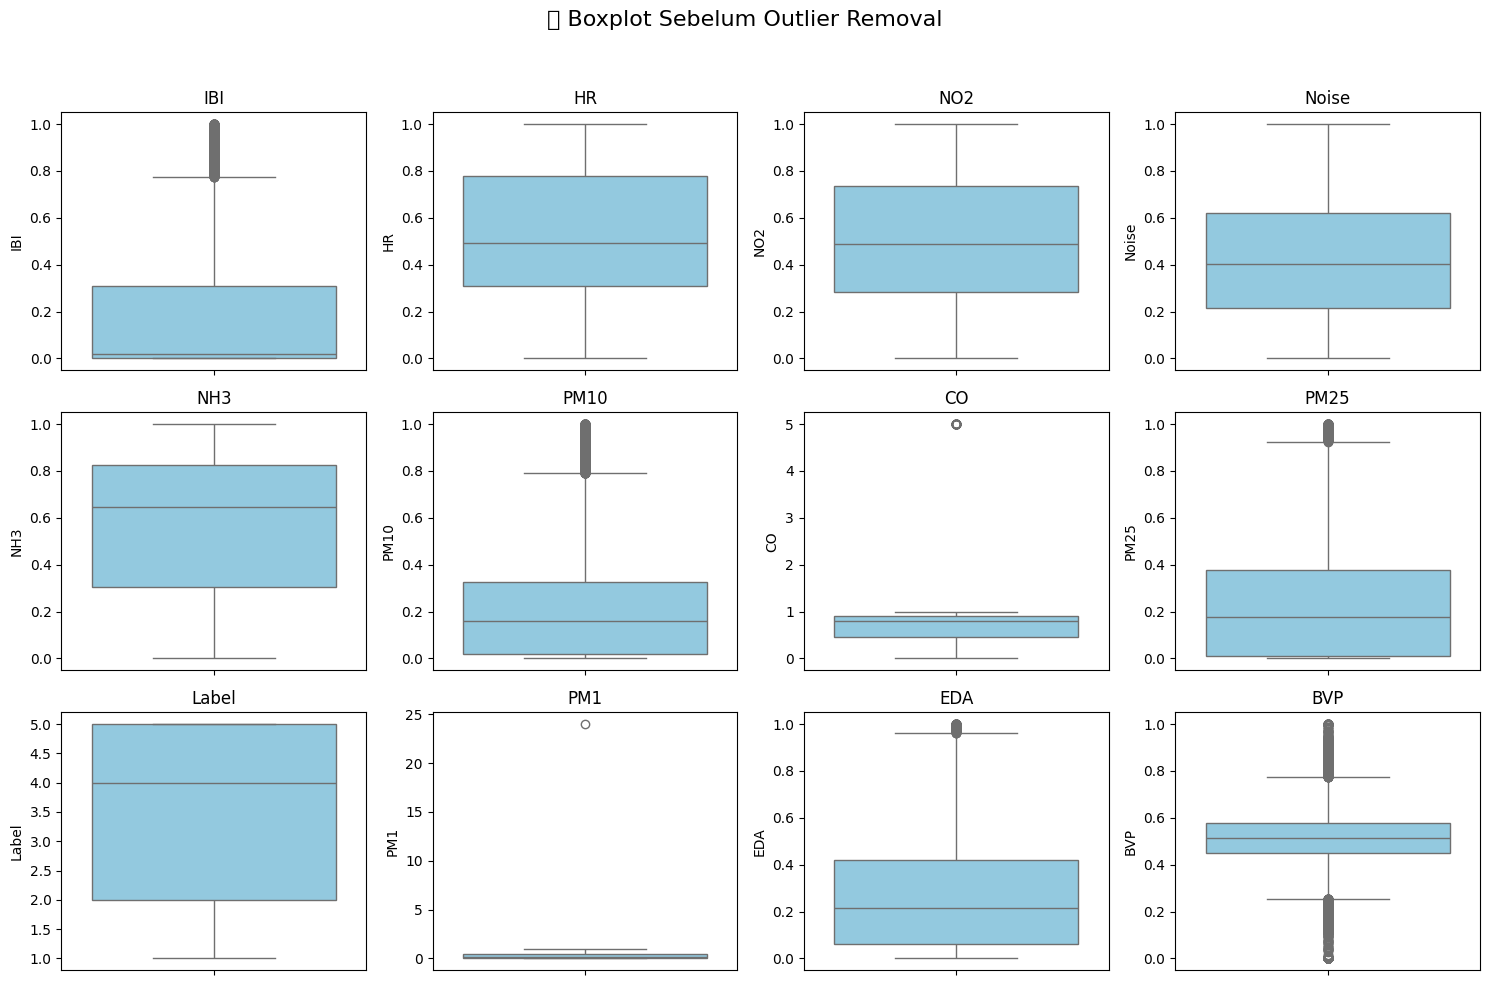

In [14]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [16]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2981/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


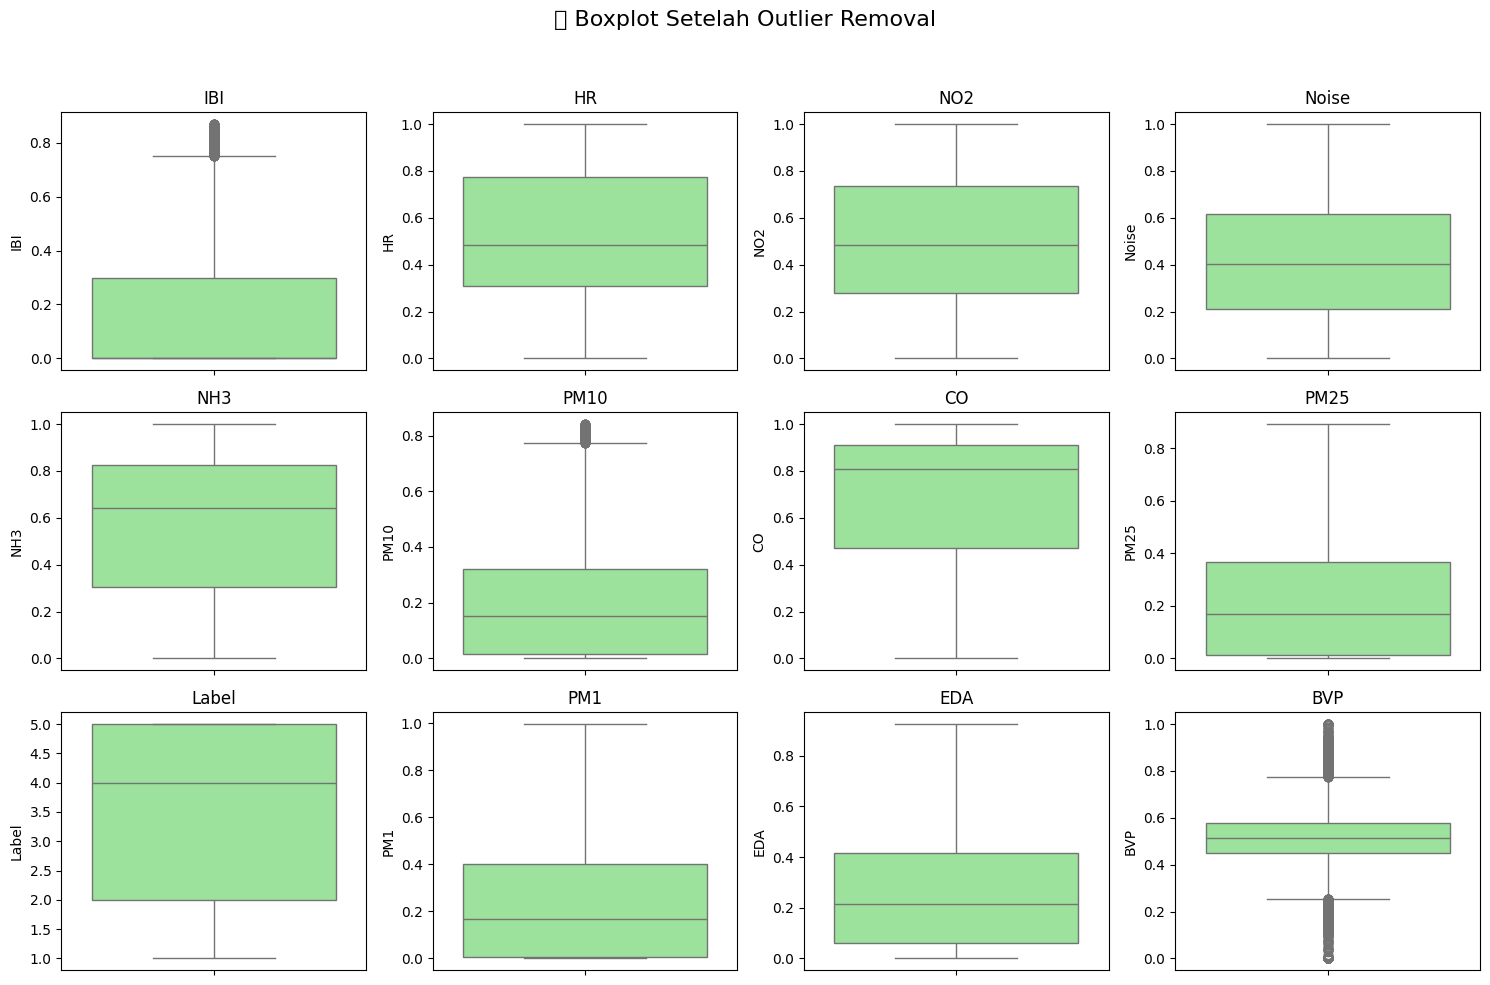

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


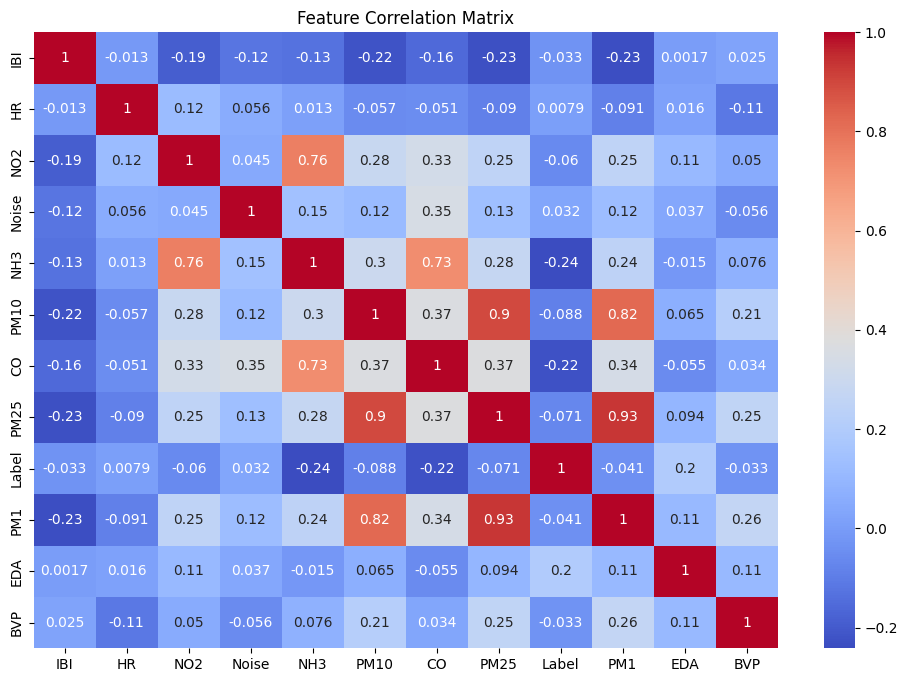

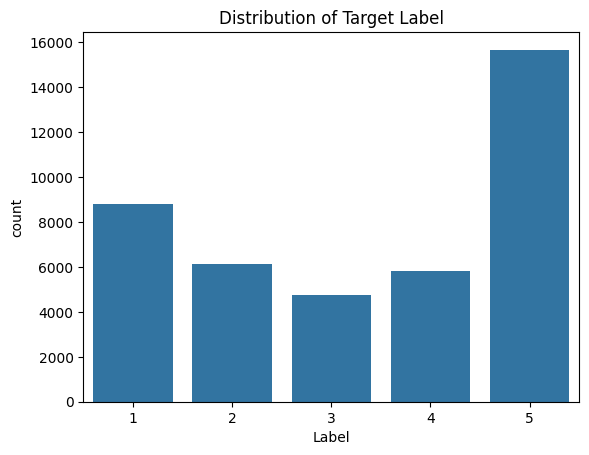

In [18]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [19]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [20]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [21]:
import pandas as pd
## under sampling
# Gabungkan X dan y biar gampang sampling
df_full = X.copy()
df_full["Label"] = y

# Cari jumlah terkecil
min_count = df_full["Label"].value_counts().min()  # 4741

# Undersampling per kelas
df_balanced = (
    df_full.groupby("Label", group_keys=False)
           .apply(lambda x: x.sample(min_count, random_state=42))
)
### data balance

# Pisahkan lagi X dan y
X_balanced = df_balanced.drop("Label", axis=1)
y_balanced = df_balanced["Label"]

print(X_balanced.shape)        # (23705, 11)
print(y_balanced.value_counts())


(23705, 11)
Label
1    4741
2    4741
3    4741
4    4741
5    4741
Name: count, dtype: int64


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2981/759403527.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


In [22]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 28056 to 4698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     23705 non-null  float64
 1   HR      23705 non-null  float64
 2   NO2     23705 non-null  float64
 3   Noise   23705 non-null  float64
 4   NH3     23705 non-null  float64
 5   PM10    23705 non-null  float64
 6   CO      23705 non-null  float64
 7   PM25    23705 non-null  float64
 8   PM1     23705 non-null  float64
 9   EDA     23705 non-null  float64
 10  BVP     23705 non-null  float64
dtypes: float64(11)
memory usage: 2.2 MB


## Prepocessing

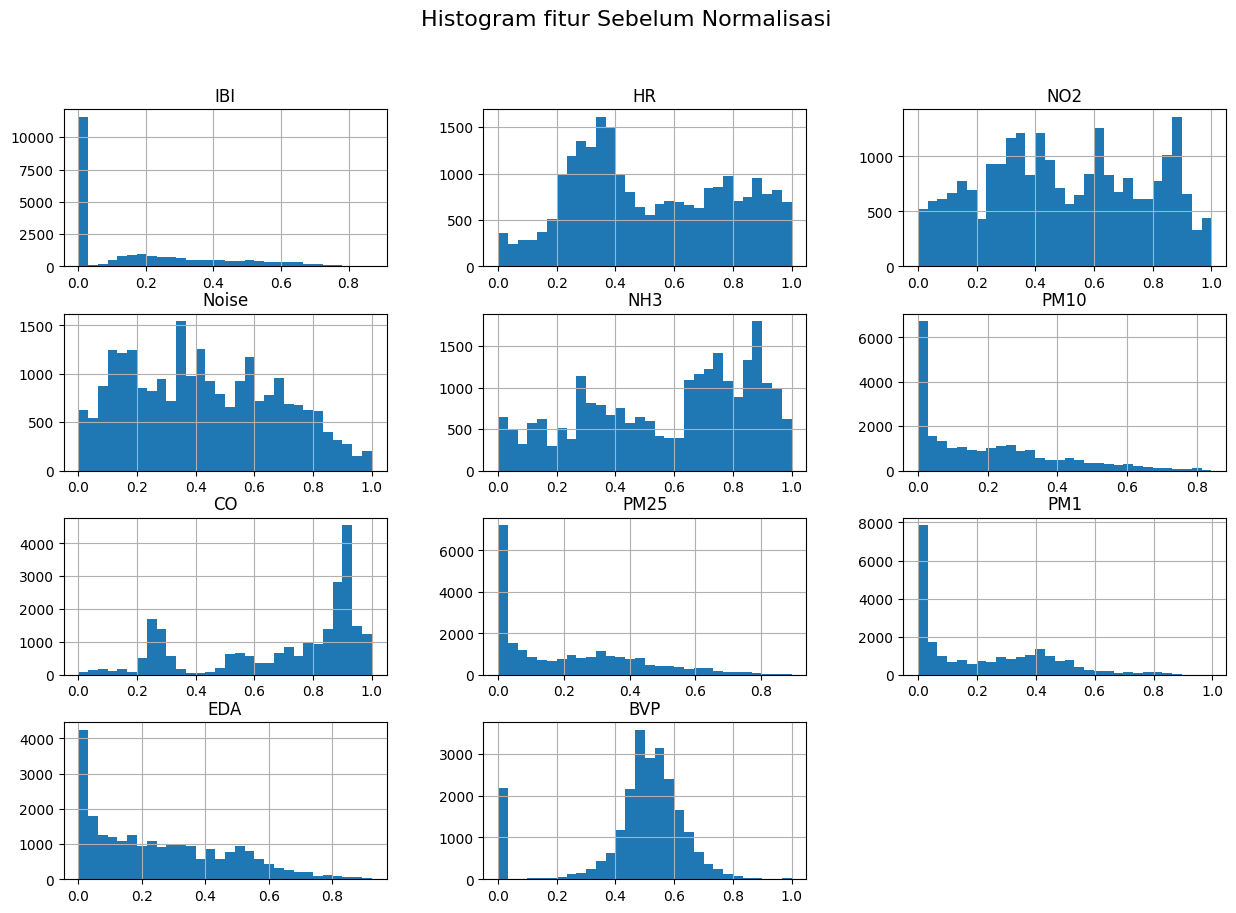

In [23]:
# Histogram sebelum normalisasi
X_balanced.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [25]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (18964, 11)
Data Test after normalisation = (4741, 11)


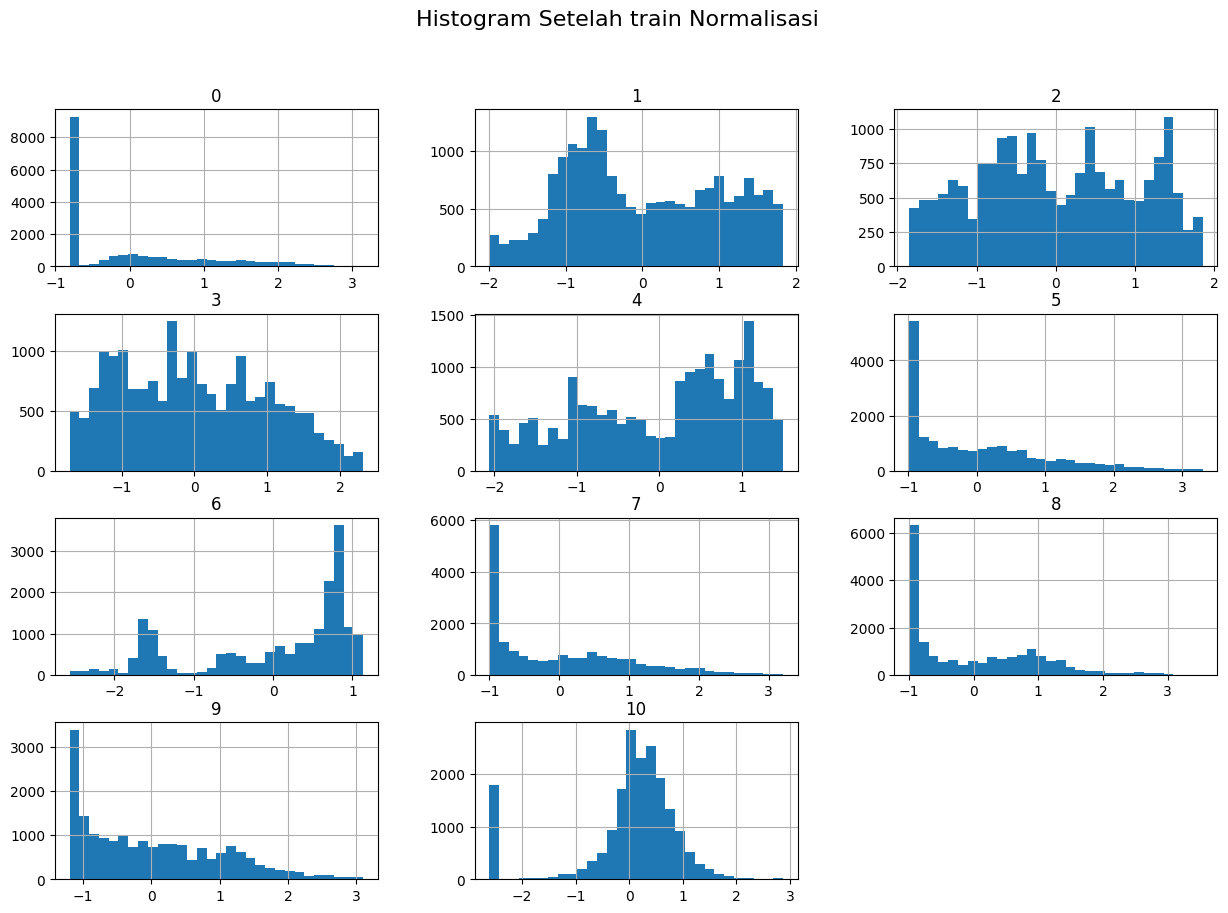

In [26]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

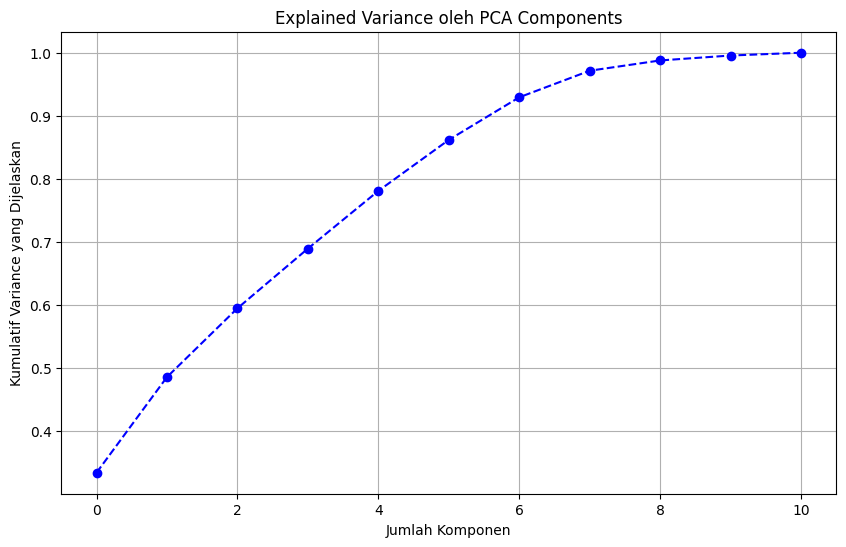

In [27]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [28]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3344 variance terjelaskan
Komponen ke-2: 0.4860 variance terjelaskan
Komponen ke-3: 0.5950 variance terjelaskan
Komponen ke-4: 0.6896 variance terjelaskan
Komponen ke-5: 0.7810 variance terjelaskan
Komponen ke-6: 0.8619 variance terjelaskan
Komponen ke-7: 0.9293 variance terjelaskan
Komponen ke-8: 0.9715 variance terjelaskan
Komponen ke-9: 0.9878 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [29]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18964, 7)
Shape test PCA: (4741, 7)


## Training Data

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_ann(X_train, X_test, y_train, y_test, percobaan="ANN_Full", output_file="results_ann.csv", epochs=30, batch_size=32):
    input_dim = X_train.shape[1]  # jumlah fitur

    # Normalisasi label supaya mulai dari 0
    unique_labels = np.unique(np.concatenate([y_train, y_test]))
    label_mapping = {old: new for new, old in enumerate(unique_labels)}
    y_train = np.array([label_mapping[y] for y in y_train])
    y_test = np.array([label_mapping[y] for y in y_test])

    n_classes = len(unique_labels)  # jumlah kelas sebenarnya
    
    # Definisi model ANN
    model = Sequential([
        Dense(128, activation="relu", input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(n_classes, activation="softmax")  # output sesuai jumlah kelas
    ])
    
    # Kompilasi model
    model.compile(optimizer="adam", 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])
    
    # Training
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=epochs, 
                        batch_size=batch_size,
                        verbose=1)
    
    # Evaluasi
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    
    # Simpan hasil ke dataframe
    df_results = pd.DataFrame([{
        "Percobaan": percobaan,
        "Model": "ANN",
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }])
    
    print("\n📊 Hasil Evaluasi ANN:")
    print(df_results)
    
    # Simpan ke CSV (append kalau sudah ada)
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)
    
    # Plot loss & akurasi
    plt.figure(figsize=(12,5))
    
    # Akurasi
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()
    
    return df_results, model


Epoch 1/50
1186/1186 [==============================] - 1s 916us/step - loss: 1.4125 - accuracy: 0.4178 - val_loss: 1.2603 - val_accuracy: 0.4915
Epoch 2/50
1186/1186 [==============================] - 1s 844us/step - loss: 1.2525 - accuracy: 0.5041 - val_loss: 1.1580 - val_accuracy: 0.5370
Epoch 3/50
1186/1186 [==============================] - 1s 915us/step - loss: 1.1688 - accuracy: 0.5445 - val_loss: 1.0801 - val_accuracy: 0.5693
Epoch 4/50
1186/1186 [==============================] - 1s 796us/step - loss: 1.1118 - accuracy: 0.5637 - val_loss: 1.0183 - val_accuracy: 0.5986
Epoch 5/50
1186/1186 [==============================] - 1s 820us/step - loss: 1.0656 - accuracy: 0.5852 - val_loss: 0.9881 - val_accuracy: 0.6146
Epoch 6/50
1186/1186 [==============================] - 1s 769us/step - loss: 1.0316 - accuracy: 0.5934 - val_loss: 0.9380 - val_accuracy: 0.6406
Epoch 7/50
1186/1186 [==============================] - 1s 762us/step - loss: 1.0039 - accuracy: 0.6132 - val_loss: 0.9146 -

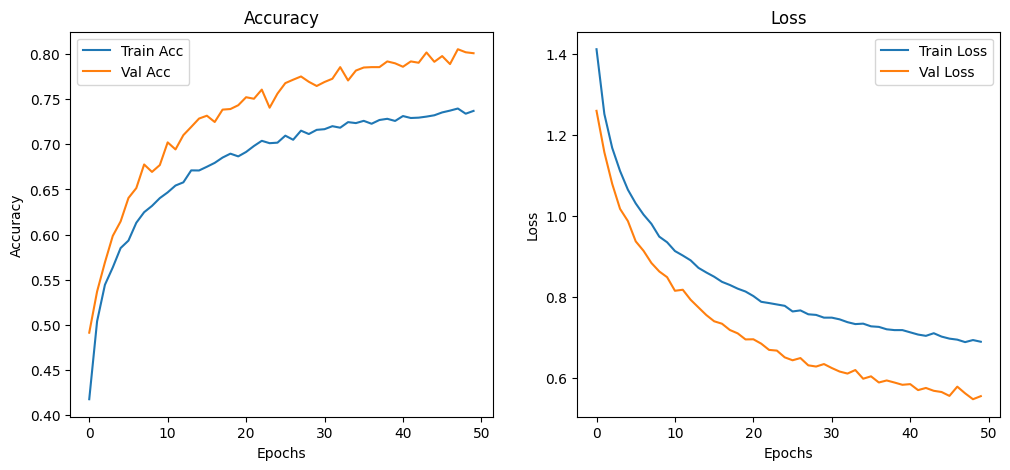

In [31]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train, X_test, y_train, y_test,
    percobaan="ANN Percobaan baseline udersampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


Epoch 1/50
1186/1186 [==============================] - 1s 826us/step - loss: 1.2917 - accuracy: 0.4815 - val_loss: 1.1093 - val_accuracy: 0.5784
Epoch 2/50
1186/1186 [==============================] - 1s 766us/step - loss: 1.1246 - accuracy: 0.5635 - val_loss: 0.9967 - val_accuracy: 0.6227
Epoch 3/50
1186/1186 [==============================] - 1s 735us/step - loss: 1.0464 - accuracy: 0.5947 - val_loss: 0.9312 - val_accuracy: 0.6404
Epoch 4/50
1186/1186 [==============================] - 1s 738us/step - loss: 0.9916 - accuracy: 0.6165 - val_loss: 0.8686 - val_accuracy: 0.6691
Epoch 5/50
1186/1186 [==============================] - 1s 738us/step - loss: 0.9539 - accuracy: 0.6329 - val_loss: 0.8392 - val_accuracy: 0.6878
Epoch 6/50
1186/1186 [==============================] - 1s 773us/step - loss: 0.9235 - accuracy: 0.6493 - val_loss: 0.8016 - val_accuracy: 0.7043
Epoch 7/50
1186/1186 [==============================] - 1s 759us/step - loss: 0.8981 - accuracy: 0.6577 - val_loss: 0.7725 -

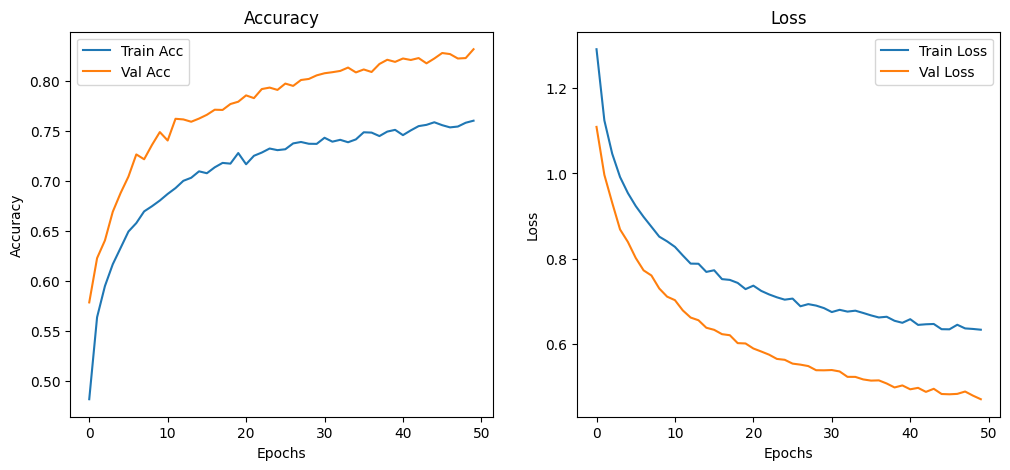

In [32]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_scaled, X_test_scaled, y_train, y_test,
    percobaan="ANN Percobaan normalisasi udersampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [33]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18964, 7)
Shape test PCA: (4741, 7)


Epoch 1/50
1186/1186 [==============================] - 1s 799us/step - loss: 1.3343 - accuracy: 0.4610 - val_loss: 1.1793 - val_accuracy: 0.5336
Epoch 2/50
1186/1186 [==============================] - 1s 744us/step - loss: 1.1929 - accuracy: 0.5326 - val_loss: 1.0768 - val_accuracy: 0.5847
Epoch 3/50
1186/1186 [==============================] - 1s 738us/step - loss: 1.1173 - accuracy: 0.5639 - val_loss: 1.0196 - val_accuracy: 0.5999
Epoch 4/50
1186/1186 [==============================] - 1s 758us/step - loss: 1.0838 - accuracy: 0.5755 - val_loss: 0.9833 - val_accuracy: 0.6197
Epoch 5/50
1186/1186 [==============================] - 1s 773us/step - loss: 1.0490 - accuracy: 0.5872 - val_loss: 0.9579 - val_accuracy: 0.6195
Epoch 6/50
1186/1186 [==============================] - 1s 737us/step - loss: 1.0227 - accuracy: 0.5995 - val_loss: 0.9203 - val_accuracy: 0.6507
Epoch 7/50
1186/1186 [==============================] - 1s 735us/step - loss: 0.9992 - accuracy: 0.6082 - val_loss: 0.8934 -

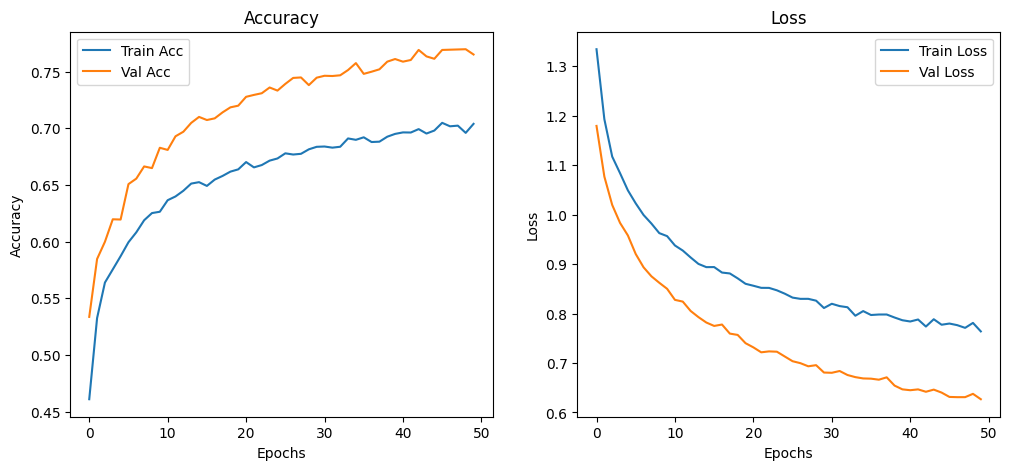

In [34]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 7 udersampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [35]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18964, 6)
Shape test PCA: (4741, 6)


Epoch 1/50
1186/1186 [==============================] - 1s 787us/step - loss: 1.3429 - accuracy: 0.4522 - val_loss: 1.1980 - val_accuracy: 0.5201
Epoch 2/50
1186/1186 [==============================] - 1s 737us/step - loss: 1.2226 - accuracy: 0.5184 - val_loss: 1.1294 - val_accuracy: 0.5628
Epoch 3/50
1186/1186 [==============================] - 1s 734us/step - loss: 1.1599 - accuracy: 0.5470 - val_loss: 1.0799 - val_accuracy: 0.5748
Epoch 4/50
1186/1186 [==============================] - 1s 738us/step - loss: 1.1259 - accuracy: 0.5588 - val_loss: 1.0339 - val_accuracy: 0.5942
Epoch 5/50
1186/1186 [==============================] - 1s 768us/step - loss: 1.0911 - accuracy: 0.5683 - val_loss: 1.0052 - val_accuracy: 0.5992
Epoch 6/50
1186/1186 [==============================] - 1s 728us/step - loss: 1.0598 - accuracy: 0.5803 - val_loss: 0.9737 - val_accuracy: 0.6208
Epoch 7/50
1186/1186 [==============================] - 1s 729us/step - loss: 1.0470 - accuracy: 0.5847 - val_loss: 0.9509 -

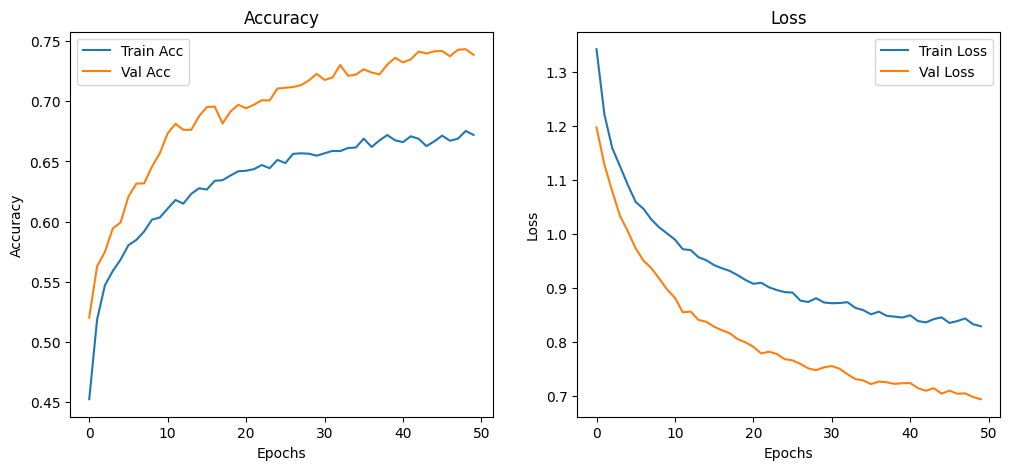

In [36]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 6 udersampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [37]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18964, 5)
Shape test PCA: (4741, 5)


Epoch 1/50
1186/1186 [==============================] - 1s 783us/step - loss: 1.3683 - accuracy: 0.4341 - val_loss: 1.2401 - val_accuracy: 0.4984
Epoch 2/50
1186/1186 [==============================] - 1s 736us/step - loss: 1.2528 - accuracy: 0.4951 - val_loss: 1.1621 - val_accuracy: 0.5250
Epoch 3/50
1186/1186 [==============================] - 1s 735us/step - loss: 1.1992 - accuracy: 0.5179 - val_loss: 1.1216 - val_accuracy: 0.5511
Epoch 4/50
1186/1186 [==============================] - 1s 735us/step - loss: 1.1655 - accuracy: 0.5347 - val_loss: 1.0802 - val_accuracy: 0.5611
Epoch 5/50
1186/1186 [==============================] - 1s 770us/step - loss: 1.1326 - accuracy: 0.5401 - val_loss: 1.0557 - val_accuracy: 0.5665
Epoch 6/50
1186/1186 [==============================] - 1s 733us/step - loss: 1.1171 - accuracy: 0.5505 - val_loss: 1.0324 - val_accuracy: 0.5798
Epoch 7/50
1186/1186 [==============================] - 1s 728us/step - loss: 1.0944 - accuracy: 0.5636 - val_loss: 1.0148 -

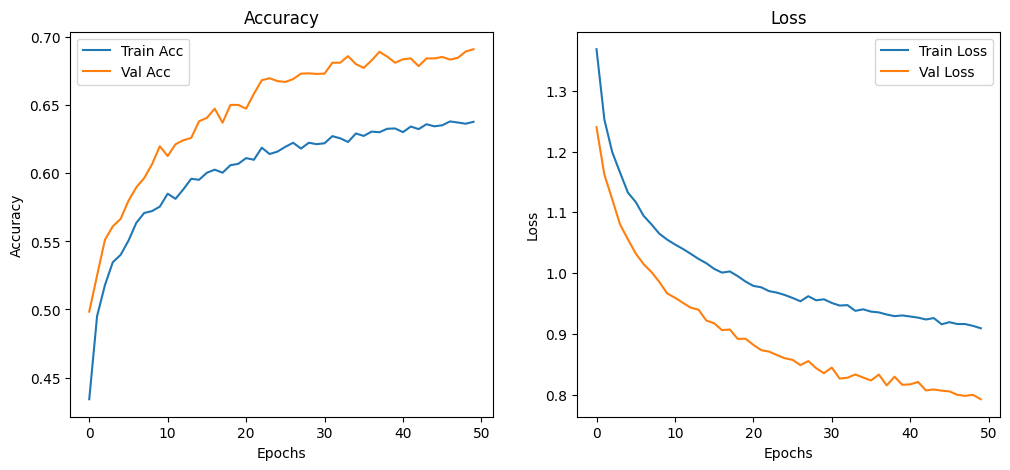

In [38]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 5 udersampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)
